In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
with open('Earth_2017_2020.txt', 'r') as myfile:
    qs=myfile.read().split('\n') # .replace('\n', ' ').replace('\t','')

In [3]:
ii=0
# Strip the header
while(qs[ii] != '$$SOE'):
    # print(qs[ii])
    ii=ii+1
print('[{}] {}'.format(ii,qs[ii]))
ii = ii+1

df = pd.DataFrame(columns=['jd', 'date', 'x', 'y', 'z', 'u', 'v', 'w', 'lt', 'rg', 'rr'])

while(qs[ii] != '$$EOE'):
    tmp0 = qs[ii  ].replace('=-',' -').replace('= ',' ').strip().split(' ')
    tmp1 = qs[ii+1].replace('=-',' -').replace('= ',' ').strip().split(' ')
    tmp2 = qs[ii+2].replace('=-',' -').replace('= ',' ').strip().split(' ')
    tmp3 = qs[ii+3].replace('=-',' -').replace('= ',' ').strip().split(' ')
    thisRow = {
        "jd": float(tmp0[0]),
        "date": tmp0[3],
        "x": float(tmp1[2]),
        "y": float(tmp1[5]),
        "z": float(tmp1[8]),
        "u": float(tmp2[1]),
        "v": float(tmp2[3]),
        "w": float(tmp2[5]),
        "lt": float(tmp3[1]),
        "rg": float(tmp3[3]),
        "rr": float(tmp3[5])
    }
    df = df.append(thisRow, ignore_index=True)
    ii=ii+4
df['date'] = pd.to_datetime(df['date'])
print('[{}] {}'.format(ii,qs[ii]))



[55] $$SOE
[4440] $$EOE


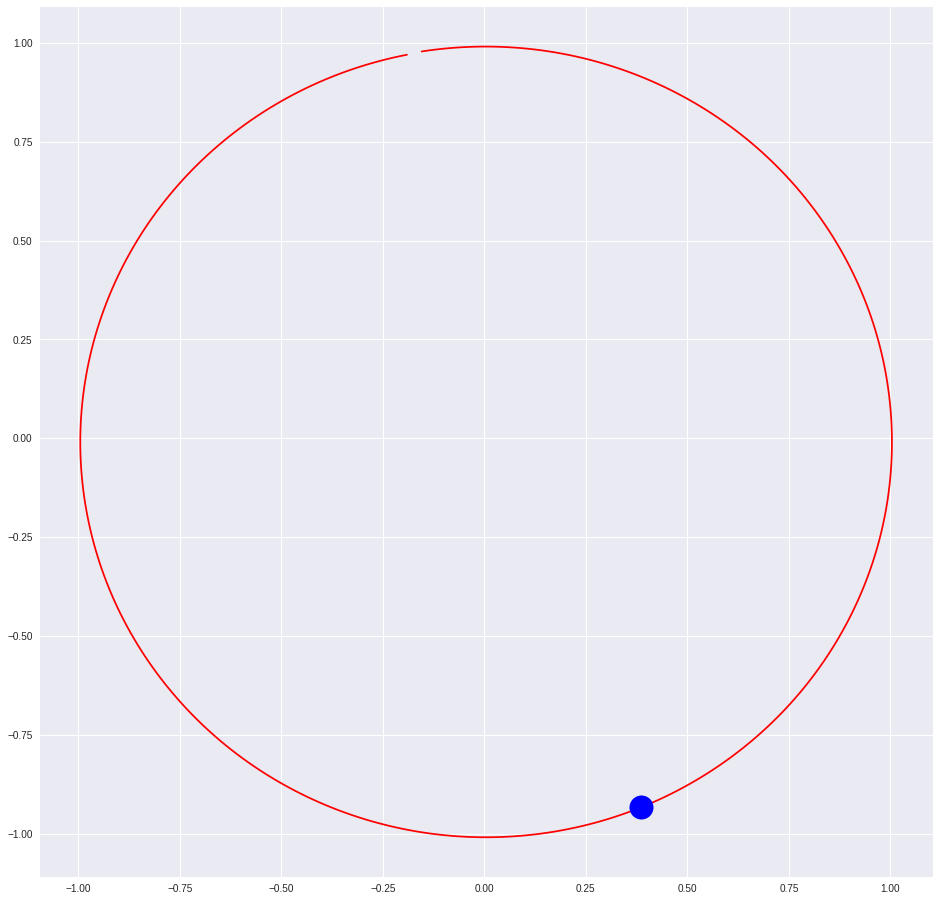

In [44]:
plt.figure(figsize=(16,16))
idx = (df['date']>'2018-01-01') & (df['date']<'2019-01-01') 
plt.plot(df.x[idx],df.y[idx],'r')
plt.plot(df.x[df['date']=='2018-07-15'],df.y[df['date']=='2018-07-15'],'bo',markersize=24)
plt.show()

#### df['y'].min()